In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import random 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

In [2]:
def myLogisticRegression(X, Y, test_size=0.33, random_state=None):

    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    clf = linear_model.LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)

    clf.fit(xTrain, yTrain)

    yPred = clf.predict(xTest)
    
    # score
    scoreTrain = clf.score(xTrain, yTrain)
    scoreTest = clf.score(xTest, yTest)

    print("Score of training set = {:.3f}".format(scoreTrain))
    print("Score of testing set = {:.3f} ".format(scoreTest))
    
    return scoreTrain, scoreTest

In [3]:
from mnist import MNIST

mndata = MNIST("../../data/MNIST_data")

X, y = mndata.load_training()

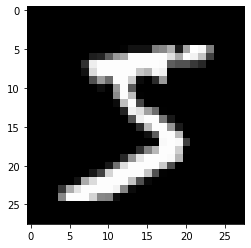

In [4]:
img = np.array(X[0])
img = img.reshape(28, 28)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=0)

xTrain, xTest, yTrain, yTest = train_test_split(xTest, yTest, test_size=0.25, random_state=0)

clf = linear_model.LogisticRegression(fit_intercept=True,
                                        multi_class='auto',
                                        penalty='l1', #lasso regression
                                        solver='saga',
                                        max_iter=1000,
                                        C=50,
                                        verbose=2, # output progress
                                        n_jobs=4, # parallelize over 4 processes
                                        tol=0.01)

clf.fit(xTrain, yTrain)

yPred = clf.predict(xTest)

# score
scoreTrain = clf.score(xTrain, yTrain)
scoreTest = clf.score(xTest, yTest)

print("Score of training set = {:.3f}".format(scoreTrain))
print("Score of testing set = {:.3f} ".format(scoreTest))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.19718807
Epoch 3, change: 0.11267542
Epoch 4, change: 0.09098529
Epoch 5, change: 0.07104640
Epoch 6, change: 0.06427443
Epoch 7, change: 0.05583697
Epoch 8, change: 0.05215005
Epoch 9, change: 0.04776554
Epoch 10, change: 0.04299489
Epoch 11, change: 0.04044553
Epoch 12, change: 0.03904692
Epoch 13, change: 0.03567829
Epoch 14, change: 0.03236651
Epoch 15, change: 0.03063955
Epoch 16, change: 0.02848891
Epoch 17, change: 0.02739116
Epoch 18, change: 0.02535133
Epoch 19, change: 0.02426389
Epoch 20, change: 0.02278902
Epoch 21, change: 0.02189015
Epoch 22, change: 0.02063916
Epoch 23, change: 0.01971829
Epoch 24, change: 0.01861245
Epoch 25, change: 0.01798148
Epoch 26, change: 0.01722881
Epoch 27, change: 0.01673895
Epoch 28, change: 0.01564602
Epoch 29, change: 0.01550981
Epoch 30, change: 0.01430759
Epoch 31, change: 0.01380720
Epoch 32, change: 0.01333124
Epoch 33, change: 0.01309810
Epoch 34, change: 0.01278660
Epoch 35, change: 0.012

[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   25.7s finished


Score of training set = 0.957
Score of testing set = 0.903 


In [6]:
print("Report: ")
print(metrics.classification_report(yTest, yPred))

Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       359
           1       0.93      0.98      0.96       430
           2       0.86      0.88      0.87       338
           3       0.87      0.87      0.87       379
           4       0.93      0.91      0.92       357
           5       0.85      0.83      0.84       345
           6       0.94      0.95      0.95       380
           7       0.93      0.89      0.91       361
           8       0.90      0.83      0.86       377
           9       0.86      0.90      0.88       424

    accuracy                           0.90      3750
   macro avg       0.90      0.90      0.90      3750
weighted avg       0.90      0.90      0.90      3750



## in MNIST wiki , linear classifier (1-layer NN) TEST ERROR RATE ~12% = 88% accuracy

In [7]:
w = clf.coef_

In [8]:
w[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.84318472e-08, -1.99912973e-07,  0.00000000e+00,
       -1.92930578e-06, -8.44393336e-06, -2.47525226e-05, -3.01740759e-06,
       -3.60594223e-07, -4.88149240e-07,  0.00000000e+00, -3.37903351e-07,
       -6.72767657e-08,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

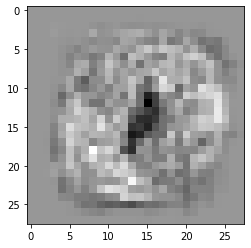

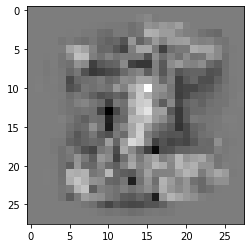

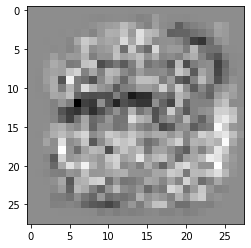

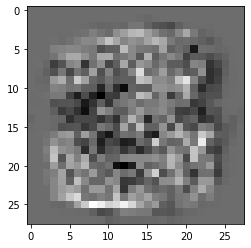

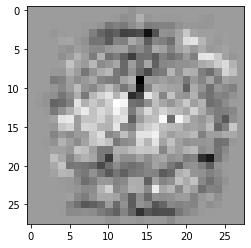

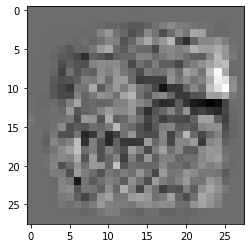

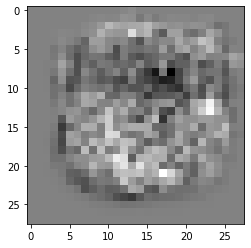

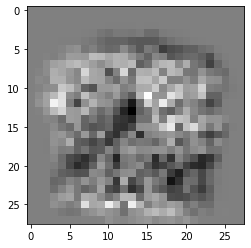

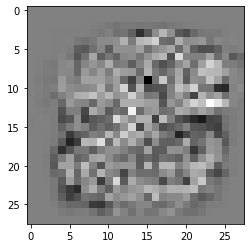

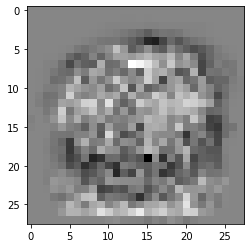

In [10]:
for idx in range(10):
    w = clf.coef_[idx]
    w = np.array(w)
    w = w.reshape(28, 28)
    plt.imshow(w, cmap='gray', vmin=w.min(), vmax=w.max())
    plt.show()

In [24]:
def sigmoid(z):

    prob = 1 / (1 + np.exp(-z))

    return prob

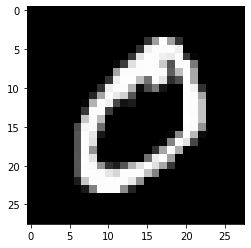

In [31]:
idx = 1

img = np.array(X[idx])
img = img.reshape(28, 28)
plt.imshow(img, cmap="gray")

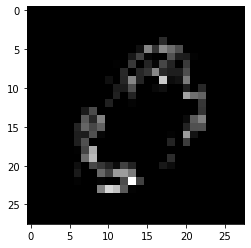

z =  17.477714173542598
prob =  0.9999999743241301


In [33]:
target = 0

w = clf.coef_[target].copy()
w = np.array(w)
w = w.reshape(28, 28)
x = X[idx].copy()
x = np.array(x)
x = x.reshape(28, 28)
b = clf.intercept_[target]
z = w * x


plt.imshow(z, cmap="gray", vmin=0)
plt.show()

print('z = ', z.sum() + b)
print('prob = ', sigmoid(z.sum() + b))

In [114]:
z.sum() + b

3.988304063346781

In [77]:
len(X[0])

784

Text(0.5, 0.98, 'Coefficients for various classes')

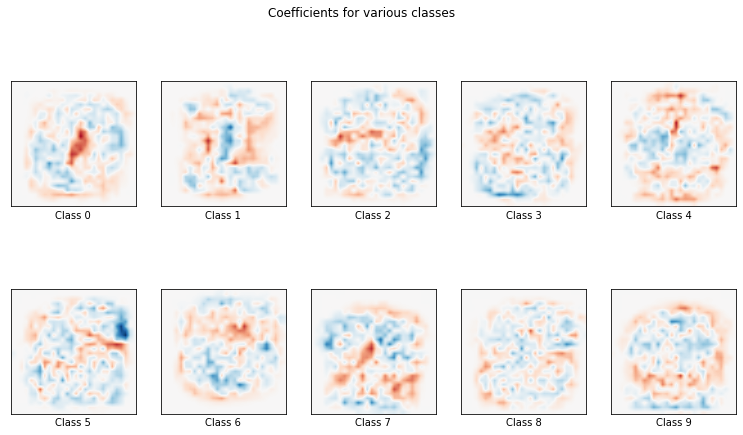

In [34]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()) 
    coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes')